>> Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_lps.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


How many loan has been accepted?

In [7]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Y: 422 accepted, N: 192 declined 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


>> Data Cleaning

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [10]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking if there's still any missing values

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#cek data duplikat
jumlah_duplikat = df.duplicated().sum()

print(f"total baris duplikat: {jumlah_duplikat}")

total baris duplikat: 0


In [14]:
# Cek format data
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Exploratory Data Analysis

<Axes: xlabel='Credit_History', ylabel='count'>

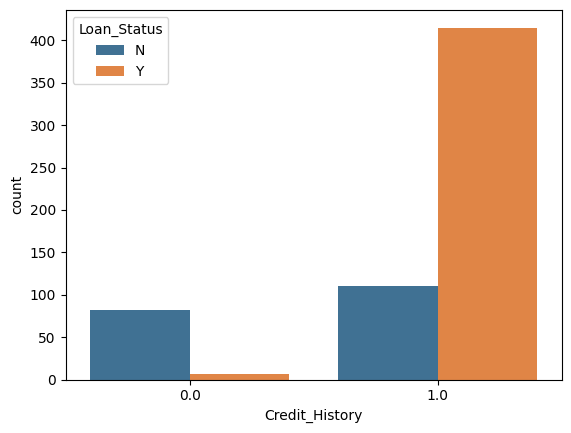

In [15]:
# Is the history credit affecting next permission?
color = {'Y': '#fa812c', 'N': '#3274a1'}
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette=color)

As we can see, if the majority of being rejected (Credit History = 0.0) blue graph is more higher than the yellow one,
And if the majority of being accepted (Credit History = 1.0) the yellow graph is more higher than the blue one

**In Conclusion if the customer having a good Credit History (1.00) so the higher chance to get accepted another credit again**

<Axes: xlabel='Married', ylabel='count'>

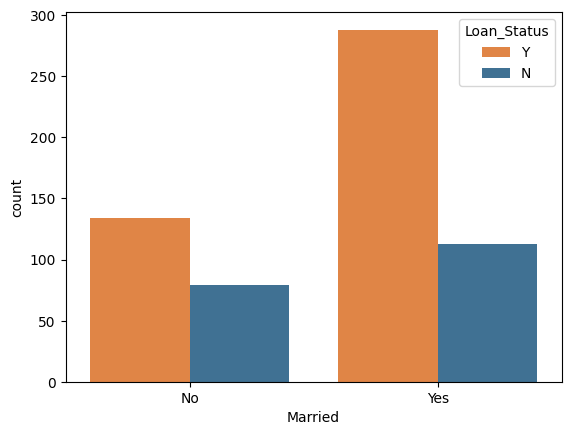

In [16]:
# Marriage status affecting to Loan
color = {'Y': '#fa812c', 'N': '#3274a1'}
sns.countplot(x='Married', hue='Loan_Status', data=df, palette=color)

As we can see, either you are married or not the majority of Loan Status is Yes **(accepted)** so it means the marriage status doesn't affect that much

<Axes: xlabel='Property_Area', ylabel='count'>

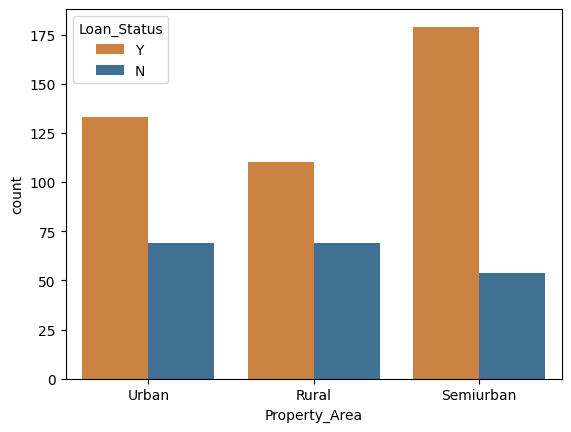

In [17]:
# Property Area affecting to Loan status
color = {'Y': '#e1812c', 'N': '#3274a1'}
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette=color)

as we can see, either you have a property in urban, rural, or semiurban the chance of getting accepted is always higher than the the rejected one. so in conclusion **Property area doesn't affect that much to the Loan_Status**  

<Axes: xlabel='Education', ylabel='count'>

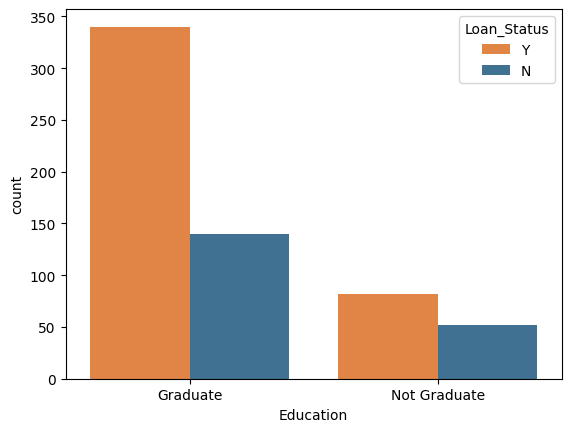

In [18]:
# Is education affecting to Loan Status?

color = {'Y': '#fa812c', 'N': '#3274a1'}
sns.countplot(x='Education', hue='Loan_Status', data=df, palette=color)

As we can see, Education is pretty affecting to the Loan_Status. The graphs shows us Graduate is much higher chanhe to get accepted more than Not Graduate. 

<Axes: xlabel='Self_Employed', ylabel='count'>

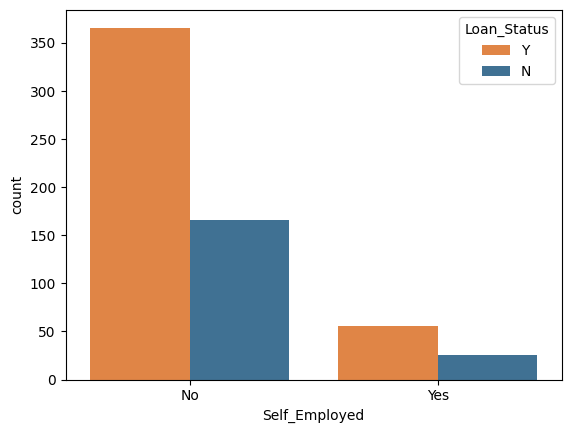

In [19]:
# Is self employed affecting to Loan Status?

color = {'Y': '#fa812c', 'N': '#3274a1'}
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette=color)

As we can see, the majority of the loan applicants are not self-employed, which means that most of the people accepted are those with a stable income.

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

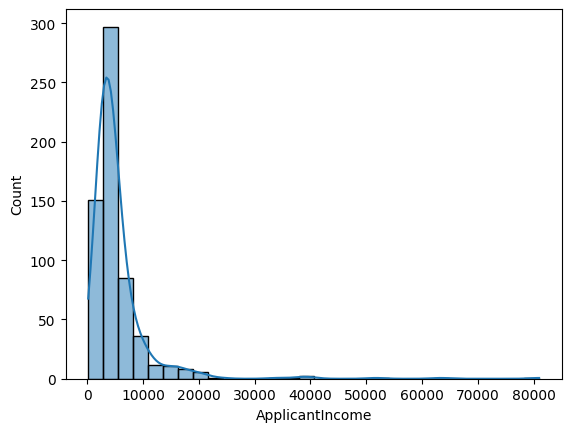

In [20]:
# Is applicant income affecting?

sns.histplot(df['ApplicantIncome'], bins=30, kde=True)

Let's say the currency is USD. On average, the loan applicants have an income of less than 10,000 USD, and we can see that the resulting graph shows a right-skewed pattern (The higher the income a person has, the fewer people apply for loans)

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


>> Preprocessing Data (Prepare Data for model)

there are a few data that cannot be process directly because of the format data, so we have to transform the data first

In [23]:
# Delete the unnecessary columns
df = df.drop(columns=['Loan_ID'])

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
# Encoding categorical columns (transform the data into numerical data)

from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


The data has been transformed into numerical data

In [27]:
# Total of Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [28]:
# Remove the ApplicantIncome and CoapplicantIncome columns
df = df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'])

In [ ]:
# Avoid the divide by zero error
df['Total_Income'] = df['Total_Income'].replace(0, 0.0001)
df['Loan_to_Income_ratio'] = df['LoanAmount'] / df['Total_Income']

# Estimated monthly payment 
df['Loan_term_ratio'] = df['LoanAmount'] / df['Total_Income']

# Drop the unnecessary columns
df = df.drop(['LoanAmount', 'Loan_Amount_Term'], axis=1)

In [77]:
# drop total income
df = df.drop(['Total_Income'], axis=1)

In [78]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_to_Income_ratio,Loan_term_ratio
0,1,0,0,0,0,1.0,2,1,0.021884,0.021884
1,1,1,1,0,0,1.0,0,0,0.021015,0.021015
2,1,1,0,0,1,1.0,2,1,0.022000,0.022000
3,1,1,0,1,0,1.0,2,1,0.024287,0.024287
4,1,0,0,0,0,1.0,2,1,0.023500,0.023500


<Axes: xlabel='Loan_to_Income_ratio', ylabel='Count'>

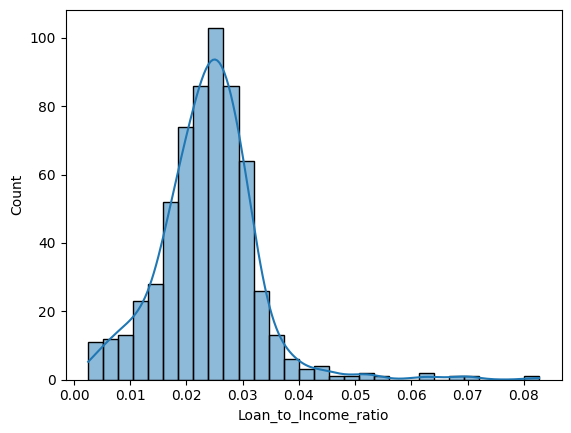

In [83]:
# Back to EDA with the new column Total_Income
sns.histplot(df['Loan_to_Income_ratio'], bins=30, kde=True)

Has the same pattern as a Applicant_Income 

>> Training Model (ML)

Aim: to predict Loan Status

In [84]:
# Separated by the loan status
X = df.drop('Loan_Status', axis=1) 
y = df['Loan_Status']

In [85]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_to_Income_ratio,Loan_term_ratio
0,1,0,0,0,0,1.0,2,1,0.021884,0.021884
1,1,1,1,0,0,1.0,0,0,0.021015,0.021015
2,1,1,0,0,1,1.0,2,1,0.022000,0.022000
3,1,1,0,1,0,1.0,2,1,0.024287,0.024287
4,1,0,0,0,0,1.0,2,1,0.023500,0.023500


In [86]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_to_Income_ratio,Loan_term_ratio
0,1,0,0,0,0,1.0,2,0.021884,0.021884
1,1,1,1,0,0,1.0,0,0.021015,0.021015
2,1,1,0,0,1,1.0,2,0.022000,0.022000
3,1,1,0,1,0,1.0,2,0.024287,0.024287
4,1,0,0,0,0,1.0,2,0.023500,0.023500


In [87]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Data Loan_Status successfully splitted

In [88]:
# Split Data (Train/Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 9) (123, 9) (491,) (123,)


In [90]:
!pip install imbalanced-learn

# add SMOTE to handle imbalanced data
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Applied SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the total of new data
print("y_train_sampled value counts:\n", y_train_resampled.value_counts())

y_train_sampled value counts:
 Loan_Status
0    342
1    342
Name: count, dtype: int64



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\lukad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [91]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [92]:
# Check
print(X_train_scaled.mean(axis=0))
print(X_test_scaled.mean(axis=0))

[ 3.63581809e-17  7.27163618e-17 -1.94775969e-17 -3.37611680e-17
 -5.19402585e-17  8.31044135e-17  5.19402585e-18  5.53163753e-16
  5.53163753e-16]
[ 0.09415285  0.25055241  0.13282854 -0.02838691  0.02490494  0.1400609
  0.05396283  0.08453964  0.08453964]


In [93]:
# Train model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model 1 using Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train_resampled)

# Model 2 using Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

Evaluate the model

In [94]:
# Prediction each model
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)

In [95]:
# Check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Hasil Logistic Regression:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Hasil Random Forest Classifier:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Hasil Logistic Regression:

Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123

Hasil Random Forest Classifier:

Accuracy: 0.6504065040650406
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        43
           1       0.75      0.70      0.72        80

    accuracy                           0.65       123
   macro avg       0.62      0.63      0.63       123
weighted avg       0.66      0.65      0.65       123



As we can see the result is so bias, recall (0) only have score 0.42 which means the model only focusing on the accepted one (1). In conclusion the model is bad at predicting the rejected one (0).

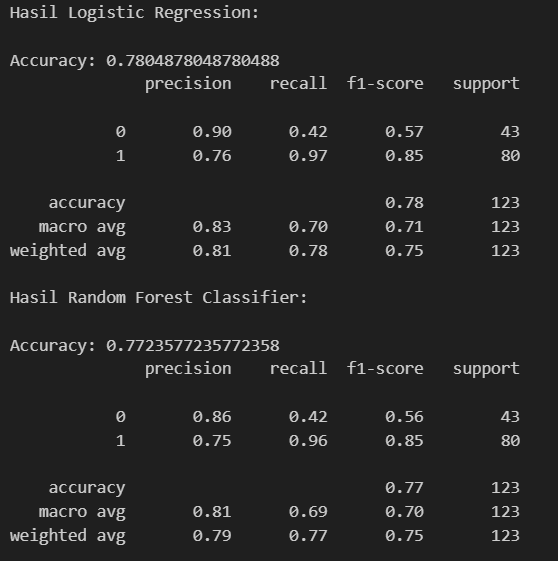

The model has improved into > 0.50 on predicting (0)

Feature Importance - Logistic Regression:
 Credit_History          1.577807
Married                 0.298284
Property_Area           0.219535
Self_Employed           0.157324
Dependents              0.148451
Education              -0.055646
Loan_term_ratio        -0.096437
Loan_to_Income_ratio   -0.096437
Gender                 -0.136819
dtype: float64


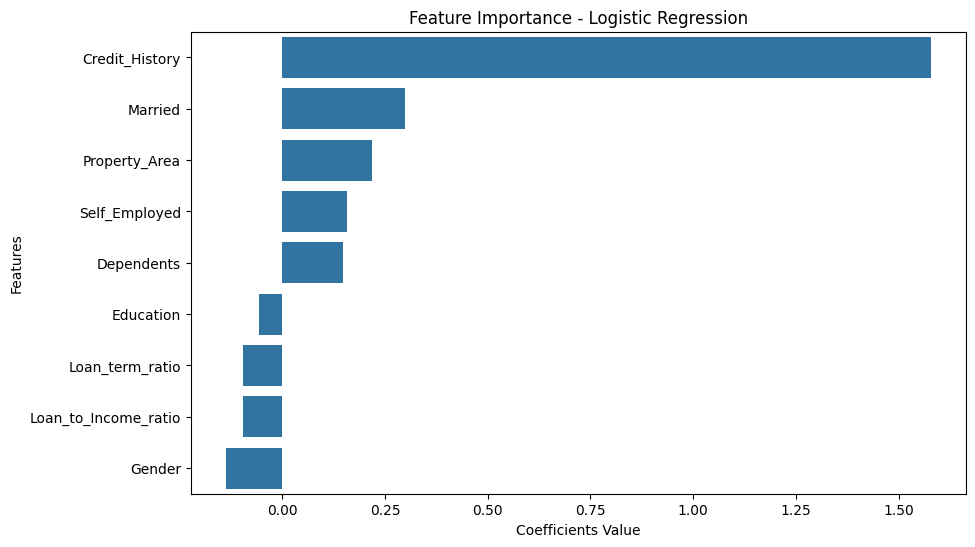

In [96]:
# Check feature importance for Logistic Regression
coefficients = model_lr.coef_[0]

feature_importance_lr = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)
print("Feature Importance - Logistic Regression:\n", feature_importance_lr)

# Visualize feature importance for Logistic Regression
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_lr.values, y=feature_importance_lr.index)
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficients Value")
plt.ylabel("Features")
plt.show()


Feature Importance - Random Forest:
 Loan_to_Income_ratio    0.266879
Loan_term_ratio         0.263901
Credit_History          0.241193
Property_Area           0.068835
Dependents              0.052754
Education               0.030434
Married                 0.028294
Gender                  0.024017
Self_Employed           0.023693
dtype: float64


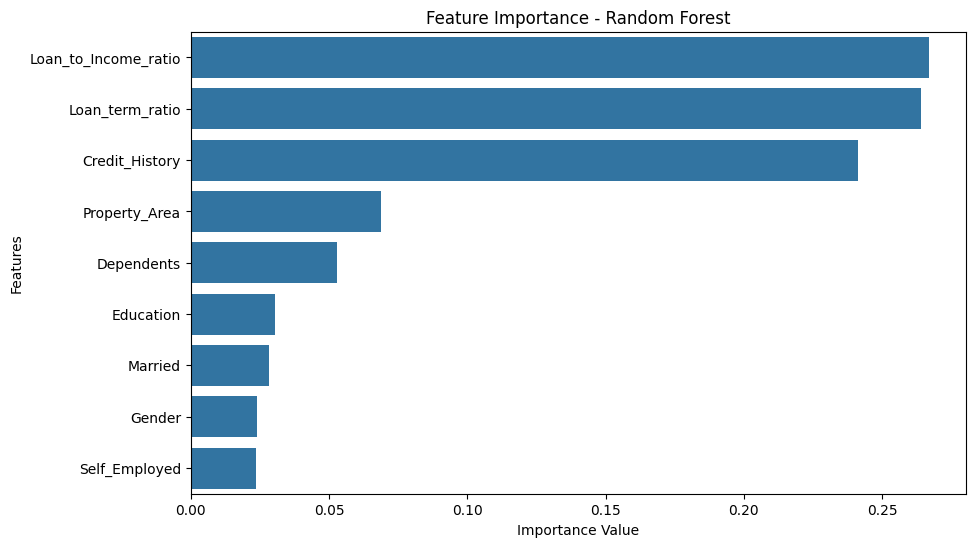

In [97]:
# Check the feature importance for Random Forest
feature_importance_rf = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance - Random Forest:\n", feature_importance_rf)

# Visualize feature importance for Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_rf.values, y=feature_importance_rf.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Value")
plt.ylabel("Features")
plt.show()